In [0]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mytransform=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(1.0,))])

train_data = torchvision.datasets.MNIST('./data',train=True,download=True,transform=mytransform)
data_loader_train = torch.utils.data.DataLoader(train_data,batch_size=200,shuffle=True,num_workers=0)

test_data = torchvision.datasets.MNIST('./data',train=False,download=True,transform=mytransform)
data_loader_test = torch.utils.data.DataLoader(test_data,batch_size=200,shuffle=True,num_workers=0)

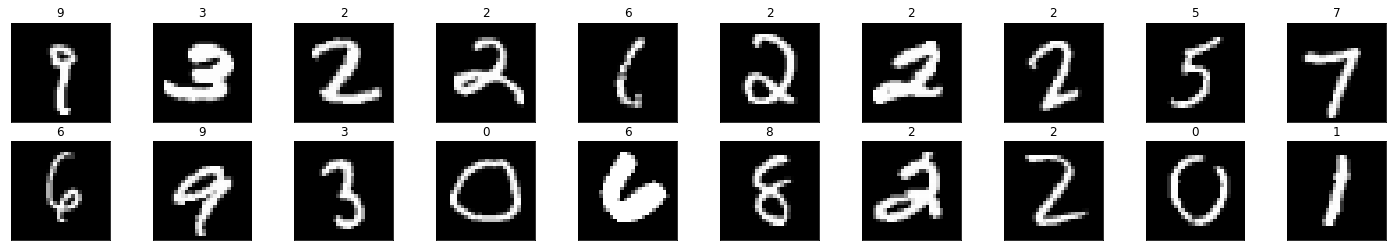

In [56]:
dataiter = iter(data_loader_test)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [57]:
# ref:https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.fc2 = nn.Linear(500, 10)
      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x))
        return x
  
net = MNISTNet()
print(net)

learning_rate=0.01
# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.95, weight_decay = 0.001)
# create a loss function
criterion = nn.CrossEntropyLoss()

MNISTNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [58]:
epochs=30
# run the main training loop
train_loss = np.zeros(epochs)
train_acc = np.zeros(epochs)
test_loss = np.zeros(epochs)
test_acc = np.zeros(epochs)
#trining
for epoch in range(epochs):
    train_correct = 0
    for batch_idx, (data, target) in enumerate(data_loader_train):
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        train_loss[epoch] += loss.item()*data.size(0)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        train_correct += pred.eq(target.data).sum()
    train_acc[epoch] = train_correct.item() / len(data_loader_train.dataset)
    train_loss[epoch] = train_loss[epoch]/len(data_loader_train.dataset)
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {}/{} ({:.0f}%)'.format(epoch+1, 
        (batch_idx+1) * len(data), len(data_loader_train.dataset),100. * batch_idx / len(data_loader_train),
        train_loss[epoch],train_correct, len(data_loader_train.dataset),
        100. *train_acc[epoch]))

    #testing
    correct = 0
    for data, target in data_loader_test:
        data = data.view(-1, 28 * 28)
        net_out = net(data)
        # sum up batch loss
        test_loss[epoch] += criterion(net_out, target).item()*data.size(0)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correct += pred.eq(target.data).sum()

    test_loss[epoch] = test_loss[epoch]/ len(data_loader_test.dataset)
    test_acc[epoch]=correct.item() / len(data_loader_test.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss[epoch], correct, len(data_loader_test.dataset),
            100. * test_acc[epoch]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.018428	Accuracy: 29095/60000 (48%)

Test set: Average loss: 1.7146, Accuracy: 8014/10000 (80%)

Train Epoch: 2 [60000/60000 (100%)]	Loss: 1.678333	Accuracy: 48992/60000 (82%)

Test set: Average loss: 1.6495, Accuracy: 8370/10000 (84%)

Train Epoch: 3 [60000/60000 (100%)]	Loss: 1.649426	Accuracy: 49865/60000 (83%)

Test set: Average loss: 1.6380, Accuracy: 8412/10000 (84%)

Train Epoch: 4 [60000/60000 (100%)]	Loss: 1.639884	Accuracy: 50256/60000 (84%)

Test set: Average loss: 1.6303, Accuracy: 8458/10000 (85%)

Train Epoch: 5 [60000/60000 (100%)]	Loss: 1.633164	Accuracy: 50604/60000 (84%)

Test set: Average loss: 1.6132, Accuracy: 8768/10000 (88%)

Train Epoch: 6 [60000/60000 (100%)]	Loss: 1.589306	Accuracy: 54000/60000 (90%)

Test set: Average loss: 1.5741, Accuracy: 9097/10000 (91%)

Train Epoch: 7 [60000/60000 (100%)]	Loss: 1.573248	Accuracy: 54624/60000 (91%)

Test set: Average loss: 1.5650, Accuracy: 9161/10000 (92%)

Train Epoch: 8 [6000

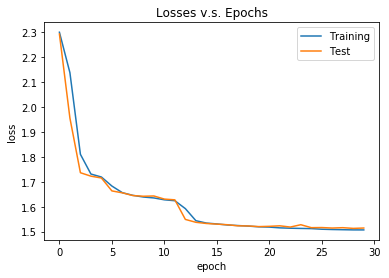

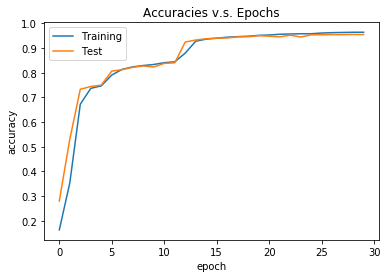

In [53]:
plt.plot(train_loss,markerfacecolor='blue',label="Training")
plt.plot(test_loss,markerfacecolor='red',label="Test")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Losses v.s. Epochs")
plt.legend()
plt.show()
plt.plot(train_acc,markerfacecolor='blue',label="Training")
plt.plot(test_acc,markerfacecolor='red',label="Test")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracies v.s. Epochs")
plt.legend()
plt.show()


In [0]:
#testing
mytransform=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(1.0,))])
test_data_pic = torchvision.datasets.MNIST('./data',train=False,download=True,transform=mytransform)
data_loader_test_pic = torch.utils.data.DataLoader(test_data_pic,batch_size=1,shuffle=True,num_workers=0)

img_loss = np.zeros(len(data_loader_test.dataset))
images=[]
labels=np.zeros(len(data_loader_test.dataset))
index=0
correct = 0
for data, target in data_loader_test_pic:
    images.append(np.asarray(data.numpy()))
    data = data.view(-1, 28 * 28)
    net_out = net(data)
    img_loss[index] = criterion(net_out, target)
    labels[index] = target
    index+=1

In [0]:
#images=np.vstack(images)
fig = plt.figure(figsize=(25, 4))
index = 0
img_loss_o=img_loss.argsort()[-10:][::-1]
print(str(images.count)) 
for idx in np.nditer(img_loss_o):
    index+=1
    ax = fig.add_subplot(2, 20/2, 11-index, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx][0]), cmap='gray')
    ax.set_title(str(labels[idx])+' loss: {:.5f}'.format(img_loss[idx],idx))
img_loss_o=img_loss.argsort()[:10]
index = 0
for idx in np.nditer(img_loss_o):
    index+=1
    ax = fig.add_subplot(2, 20/2, 21-index, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx][0]), cmap='gray')
    ax.set_title(str(labels[idx])+' loss: {:.5f}'.format(img_loss[idx],idx))